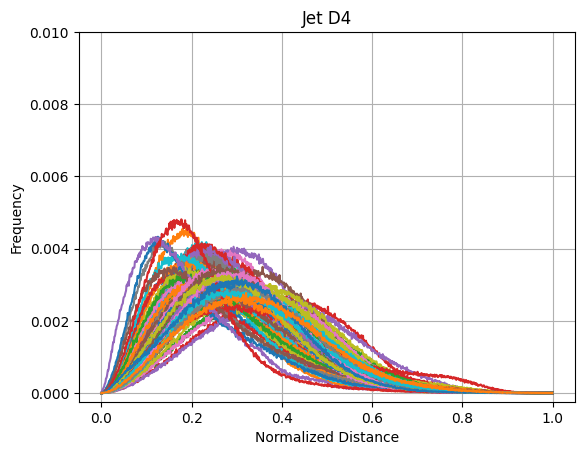

In [24]:
import numpy as np
import glob
import os
import matplotlib.pyplot  as plt


data = []

for obj_file_path in glob.glob(os.path.join(r"../features/Jet/", '*')):
    data.append(np.load(obj_file_path, allow_pickle=True))


subplot = 111
for i in range(len(data)):
    feature = data[i][-1]
    plt.subplot(subplot)
    plt.plot(np.asarray(range(len(feature))) / len(feature), feature)

plt.xlabel('Normalized Distance')
plt.ylabel('Frequency')
plt.ylim(top=0.01)
plt.title('Jet D4')
plt.grid(True)

# Display the histogram
plt.show()

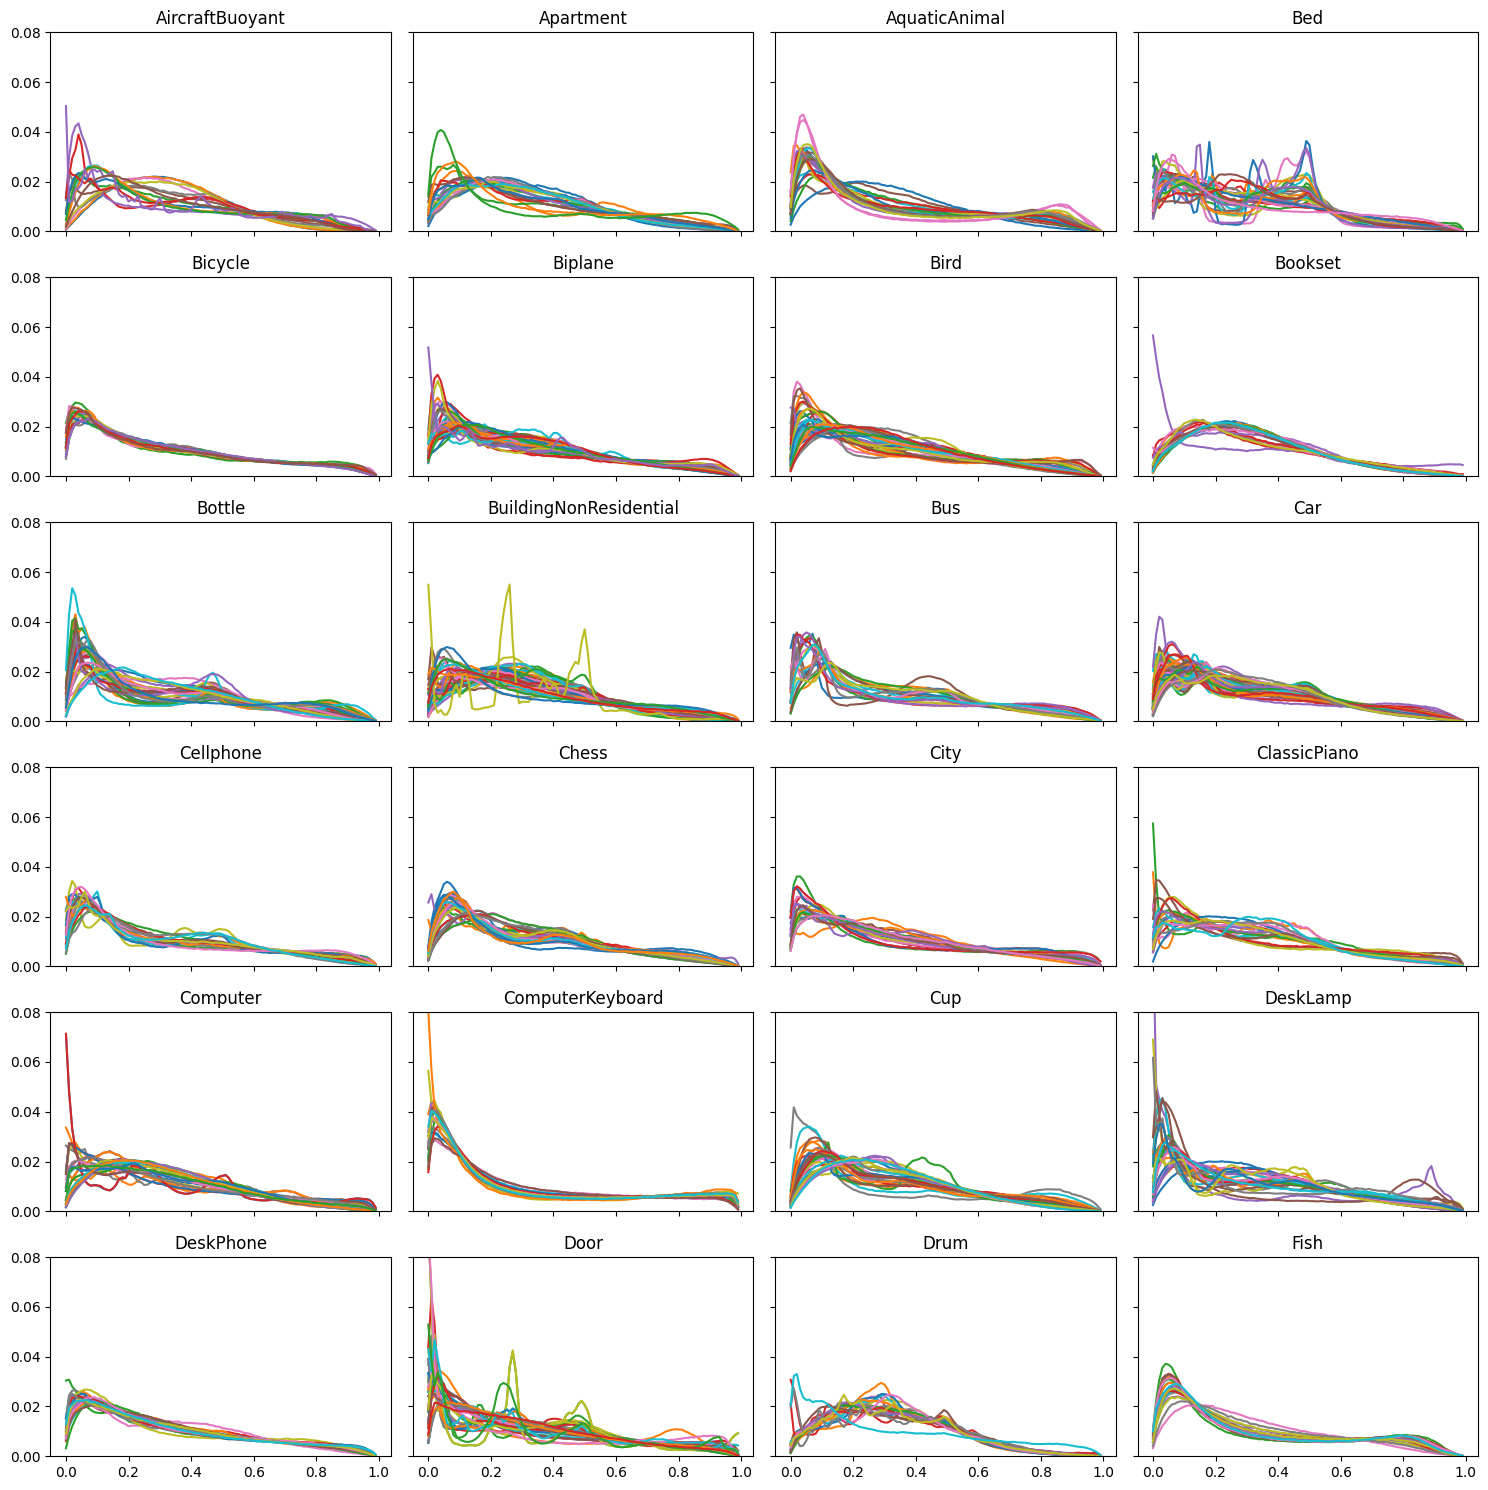

In [23]:
import numpy as np
import glob
import os
import matplotlib.pyplot  as plt
import math

data = []

class_names = []

dbpath = r"../features/"
for class_folder in os.listdir(dbpath)[:24]:
    class_names.append(class_folder)
    class_folder_path = os.path.join(dbpath, class_folder)
    class_data = []
    for obj_file_path in glob.glob(os.path.join(class_folder_path, '*')):
        class_data.append(np.load(obj_file_path, allow_pickle=True))
    data.append(class_data)


fig, axs = plt.subplots(round(len(data) / 4), 4, sharex=True, sharey=True, figsize=(15,15))
plots = axs.flatten()
for c in range(len(data)):
    class_data = data[c]
    ax = plots[c]
    for i in range(len(class_data)):
        feature = class_data[i][7]
        ax.plot(np.asarray(range(len(feature))) / len(feature), feature)
        ax.title.set_text(class_names[c])

plt.setp(axs, ylim=(0, 0.08))
fig.tight_layout()
# Display the histogram
plt.show()

In [11]:
import numpy as np
import glob
import os
import matplotlib.pyplot  as plt
import pandas as pd


data1 = []

for obj_file_path in glob.glob(os.path.join(r"../features/Bicycle", '*')):
    data1.append(np.load(obj_file_path, allow_pickle=True)[8])

df = pd.DataFrame(data1)

print(df)


     0         1         2         3         4         5         6         7   \
0   0.0  0.000281  0.000563  0.000703  0.000703  0.000281  0.000422  0.000000   
1   0.0  0.000000  0.000000  0.000264  0.000264  0.000132  0.000264  0.000396   
2   0.0  0.000000  0.000000  0.000000  0.012555  0.015517  0.013965  0.015517   
3   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000428  0.002995   
4   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.0  0.000000  0.000000  0.000000  0.000000  0.004748  0.005035  0.003165   
7   0.0  0.000000  0.000000  0.000544  0.000272  0.000272  0.000000  0.000408   
8   0.0  0.000000  0.000561  0.000561  0.001684  0.001263  0.000421  0.000000   
9   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.0  0.000287  0.000573  0.000860  0.000287  0.000287  0.002293  0.003439   
11  0.0  0.000000  0.000000 

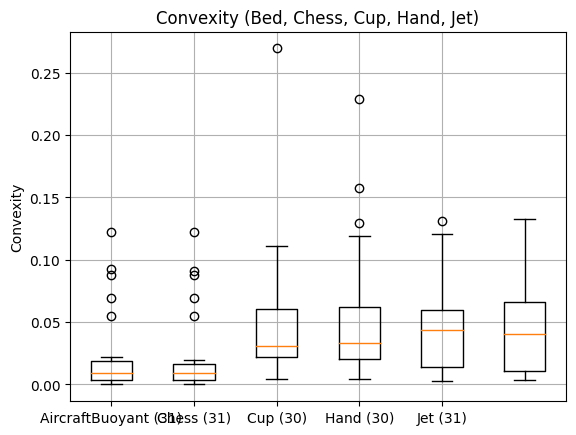

In [19]:
import numpy as np
import glob
import os
import matplotlib.pyplot  as plt


data1 = []

for obj_file_path in glob.glob(os.path.join(r"../features/Starship", '*')):
    data1.append(np.load(obj_file_path, allow_pickle=True))

data2 = []
for obj_file_path in glob.glob(os.path.join(r"../featuresO3D/Starship", '*')):
    data2.append(np.load(obj_file_path, allow_pickle=True))

data3 = []
for obj_file_path in glob.glob(os.path.join(r"../features/Cup", '*')):
    data3.append(np.load(obj_file_path, allow_pickle=True))

data4 = []
for obj_file_path in glob.glob(os.path.join(r"../featuresO3D/Cup", '*')):
    data4.append(np.load(obj_file_path, allow_pickle=True))

data5 = []
for obj_file_path in glob.glob(os.path.join(r"../features/Chess", '*')):
    data5.append(np.load(obj_file_path, allow_pickle=True))

data6 = []
for obj_file_path in glob.glob(os.path.join(r"../featuresO3D/Chess", '*')):
    data6.append(np.load(obj_file_path, allow_pickle=True))

plot1 = []
plot2 = []
plot3 = []
plot4 = []
plot5 = []
plot6 = []

maxop = 1
for test in data1:
    if test[0] < maxop:
        maxop = test[0]

index = 0

for i in range(len(data1)):
    try:
        plot1.append(data1[i][index])
    except:
        pass
    try:
        plot2.append(data2[i][index])
    except:
        pass
    try:
        plot3.append(data3[i][index])
    except:
        pass
    try:
        plot4.append(data4[i][index])
    except:
        pass
    try:
        plot5.append(data5[i][index])
    except:
        pass
    try:
        plot6.append(data6[i][index])
    except:
        pass

plt.boxplot([plot1, plot2, plot3, plot4, plot5, plot6], [])
labels = ("AircraftBuoyant ({})".format(len(plot1)), "Chess ({})".format(len(plot2)), "Cup ({})".format(len(plot3)), "Hand ({})".format(len(plot4)), "Jet ({})".format(len(plot5)))
plt.xticks(np.arange(len(labels))+1,labels)

plt.ylabel('Convexity')
plt.title('Convexity (Bed, Chess, Cup, Hand, Jet)')
plt.grid(True)

# Display the histogram
plt.show()

In [32]:

def unique_random_index(n, x, y):
    cols = []
    while len(cols) < y:
        a,b,c = np.random.randint(0, n, size=x)
        if a != b and  b != c and c != a:
            cols.append([a,b,c])
    return np.asarray(cols)

unique_random_index(7000, x=3, y=1000000) 

array([[5598, 5144, 4262],
       [3274,  894, 5831],
       [4939, 5124,  380],
       ...,
       [4016, 6581, 3396],
       [5222,  298, 6202],
       [4903, 1304, 1265]])

In [40]:
def give_random_triplets(n, m, input):
    return np.random.choice(input, size=(n, m), replace=True)

def unique_random_index(n, m, input):
    random_triplets = give_random_triplets(n, m, input)
    equal_indices = np.where((random_triplets[:, 0] == random_triplets[:, 1]) | (random_triplets[:, 1] == random_triplets[:, 2]) | (random_triplets[:, 0] == random_triplets[:, 2]))
    while equal_indices[0].size > 0:
        random_triplets[equal_indices] = give_random_triplets(random_triplets[equal_indices].shape[0], m, range(7000))
        equal_indices = np.where((random_triplets[:, 0] == random_triplets[:, 1]) | (random_triplets[:, 1] == random_triplets[:, 2]) | (random_triplets[:, 0] == random_triplets[:, 2]))
    return random_triplets

unique_random_index(1000000, 3, range(7000))

array([[2489,  975, 6289],
       [4980, 6818, 1648],
       [6241, 2988, 6047],
       ...,
       [6351, 4256, 2394],
       [6041,  733, 4192],
       [4155, 3829, 5776]])

In [18]:
import numpy as np 


a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27, 45, 67, 43.54, 50])

my_bins = np.arange(start=0, step=max(a) / 100, stop=max(a))

hist,bins = np.histogram(a,bins=my_bins)

print(len(bins))
print(hist / sum(hist))


100
[0.         0.         0.         0.         0.         0.11111111
 0.         0.         0.         0.         0.         0.
 0.05555556 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.05555556 0.
 0.         0.05555556 0.         0.         0.         0.
 0.         0.05555556 0.         0.         0.         0.05555556
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05555556 0.05555556 0.05555556 0.         0.
 0.         0.         0.         0.05555556 0.05555556 0.
 0.         0.         0.05555556 0.05555556 0.05555556 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05555556
 0.         0.         0.         0.         0.         0.05555556
 0.         0.         0.         0.         0.         0.
 0.05555556 0.         0.         0.         0.         0.
 0.         0.      

In [59]:
import math

data = []
dbpath = r"../features/"
for class_folder in os.listdir(dbpath):
    class_names.append(class_folder)
    class_folder_path = os.path.join(dbpath, class_folder)
    for obj_file_path in glob.glob(os.path.join(class_folder_path, '*')):
        data.append(np.load(obj_file_path, allow_pickle=True))

print(len(data))

for d in data:
    hists = d[7:]
    for i in range(len(hists)):
        h = hists[i]
        if not (len(h) == 100 and abs(sum(h) - 1) < 0.000000000000001):
            print("Invalid {}".format(i), len(h), sum(h))


2475
Invalid 0 100 1.000000000000001
Invalid 3 100 1.000000000000001
Invalid 2 100 0.9999999999999989
Invalid 1 100 0.9999999999999988
Invalid 1 100 0.9999999999999988


In [53]:
dbpath = r"../resampledPML/"
count = 0
for class_folder in os.listdir(dbpath):
    class_folder_path = os.path.join(dbpath, class_folder)
    for obj_file_path in glob.glob(os.path.join(class_folder_path, '*')):
        count += 1

print(count)

2544


In [42]:
def detect_hole_edges(mesh):
    triangles = np.asarray(mesh.triangles)
    seen_once = []
    seen_twice = []
    for t1, t2, t3 in triangles:
        v1 = [t1, t2]; v2 = [t2, t3]; v3 = [t3, t1]
        v1.sort(); v2.sort(); v3.sort()

        if v1 in seen_once: 
            seen_once.remove(v1)
            seen_twice.append(v1)
        elif v1 not in seen_twice:
            seen_once.append(v1)

        if v2 in seen_once: 
            seen_once.remove(v2)
            seen_twice.append(v2)
        elif v2 not in seen_twice:
            seen_once.append(v2)

        if v3 in seen_once: 
            seen_once.remove(v3)
            seen_twice.append(v3)
        elif v3 not in seen_twice:
            seen_once.append(v3)
    print(seen_twice)
    return seen_once


def get_hole_boundries(edges):
    bounds = []
    while len(edges) > 0:
        bound = [edges[0]]
        edges.remove(edges[0])
        added = True
        while added:
            added = False
            for b in bound:
                for e in edges:
                    if b[0] == e[0] or b[1] == e[0] or b[0] == e[1] or b[1] == e[1]:
                        edges.remove(e)
                        bound.append(e)
                        added = True
        bounds.append(bound)
    return bounds

def get_hole_verticies(mesh, bounds):
    vertices = np.asarray(mesh.vertices)
    bounds_verts = []
    bounds_vertsi = []
    for bound in bounds:
        bound_verts = []
        added = []
        for b1, b2 in bound:
            if b1 not in added:
                bound_verts.append(vertices[b1])
                added.append(b1)
            
            if b2 not in added:
                bound_verts.append(vertices[b2])
                added.append(b2)
        
        bounds_vertsi.append(added)
        bounds_verts.append(bound_verts)
    return bounds_verts

def generate_fan_stitch(mesh, bounds, bounds_verts):
    new_vertices = np.asarray(mesh.vertices)
    new_triangles = np.asarray(mesh.triangles)
    
    for i in range(len(bounds)):
        barycenter = np.mean(bounds_verts[i], axis=0)
        bcenter = len(new_vertices)
        new_vertices = np.vstack([new_vertices, barycenter])
        for e1, e2 in bounds[i]:
            new_triangles = np.vstack([new_triangles, [e1, e2, bcenter]])

    return new_vertices, new_triangles

def stitch_mesh_holes(mesh):
    edges = detect_hole_edges(mesh)
    print(edges)
    bounds = get_hole_boundries(edges)
    hole_verts = get_hole_verticies(mesh, bounds)
    return generate_fan_stitch(mesh, bounds, hole_verts)

In [44]:
data = np.load("../features/Starship/m1357", allow_pickle=True)[:7]

from volume import get_mesh_volume

import open3d as o3d
mesh = o3d.io.read_triangle_mesh("../resampledPML/Starship/m1357.obj")

vertices, triangles = stitch_mesh_holes(mesh)
mesh.vertices = o3d.utility.Vector3dVector(vertices)
mesh.triangles = o3d.utility.Vector3iVector(triangles)

print(get_mesh_volume(np.asarray(mesh.vertices), np.asarray(mesh.triangles)))

ls = o3d.geometry.LineSet.create_from_triangle_mesh(mesh)

o3d.visualization.draw_geometries([ls], mesh_show_back_face=True)
print(mesh.is_watertight())

[[1, 2], [0, 1], [0, 2], [0, 3], [2, 3], [2, 4], [3, 4], [4, 5], [3, 5], [3, 6], [5, 6], [5, 7], [6, 7], [5, 8], [7, 8], [8, 9], [5, 9], [11, 12], [10, 11], [10, 12], [10, 13], [11, 13], [11, 14], [13, 14], [13, 15], [14, 15], [15, 16], [13, 16], [16, 17], [13, 17], [16, 18], [17, 18], [14, 19], [11, 19], [11, 20], [19, 20], [20, 21], [19, 21], [21, 22], [20, 22], [21, 23], [22, 23], [18, 23], [18, 21], [18, 24], [23, 24], [17, 24], [26, 27], [25, 26], [25, 27], [25, 28], [27, 28], [27, 29], [28, 29], [28, 30], [25, 30], [29, 31], [27, 31], [27, 32], [31, 32], [31, 33], [32, 33], [32, 34], [33, 34], [30, 33], [33, 35], [30, 35], [34, 35], [37, 38], [36, 37], [36, 38], [36, 39], [38, 39], [41, 42], [40, 41], [40, 42], [37, 43], [38, 43], [43, 44], [38, 44], [46, 47], [45, 46], [45, 47], [45, 48], [47, 48], [50, 51], [49, 50], [49, 51], [49, 52], [51, 52], [54, 55], [53, 54], [53, 55], [53, 56], [55, 56], [53, 57], [56, 57], [57, 58], [56, 58], [60, 61], [59, 60], [59, 61], [59, 62], [61

In [46]:
import pymeshlab
import open3d as o3d
import numpy as np
gt_mesh = o3d.io.read_triangle_mesh("../resampledO3D/Starship/m1357.obj")

gt_mesh.compute_vertex_normals()

pcd = gt_mesh.sample_points_poisson_disk(3000)

tetra_mesh, pt_map = o3d.geometry.TetraMesh.create_from_point_cloud(pcd)
for alpha in np.logspace(np.log10(0.5), np.log10(0.001), num=20):
    mesh2 = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(
        pcd, alpha, tetra_mesh, pt_map)
    if not mesh2.is_watertight():
        break
    mesh = mesh2
    print(alpha)
    mesh.compute_vertex_normals()

o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)

# ms = pymeshlab.MeshSet()
# ms.load_new_mesh("../resampledPML/Starship/m1357.obj")
# ms.apply_filter("close_holes")

KeyboardInterrupt: 

In [70]:
import numpy as np

scalar_weight = 1 / 12
weights = np.append(np.full(shape=7, fill_value=(scalar_weight)), np.full(shape=500, fill_value=(scalar_weight / 100)))
weights

array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083333,
       0.00083333, 0.00083333, 0.00083333, 0.00083333, 0.00083

In [14]:
import os
import glob
import numpy as np

class_names = []
data = []
dbpath = r"../featuresO3D/"
for class_folder in os.listdir(dbpath):
    class_names.append(class_folder)
    class_folder_path = os.path.join(dbpath, class_folder)
    class_data = []
    for obj_file_path in glob.glob(os.path.join(class_folder_path, '*')):
        class_data.append(np.load(obj_file_path, allow_pickle=True))
    data.append(class_data)

print("Start Outlier Finding")

lower_bound = 0.001

outliers_all = []
weirds = []

for f in range(7):
    count = 0
    o = []
    for i in range(len(data)):
        values = []
        for j in range(len(data[i])):
            values.append(data[i][j][f])
            if data[i][j][f] < lower_bound:
                weirds.append((i,j))
        values = np.asarray(values)
        values = np.sort(values)
        mean = np.mean(values)
        Q1, Q3 = np.percentile(values, [25, 75])
        IQR = Q3 - Q1
        UF = Q3 + (1.5 * IQR)
        LF = Q1 - (1.5 * IQR)

        outliers = np.concatenate([values[values < LF], values[values > UF]])
        count += len(outliers)

        
        for j in range(len(data[i])):
            if data[i][j][f] < LF or data[i][j][f] > UF:
                o.append((i,j))
    outliers_all.append(o)


    print(f, ":", count)


Start Outlier Finding
0 : 141
1 : 127
2 : 339
3 : 157
4 : 87
5 : 163
6 : 101


In [70]:
print(len(weirds))

263


In [35]:
class_id = 26
obj_id =6
class_name = os.listdir(dbpath)[class_id]
print(class_name)
class_path = os.path.join(dbpath, class_name)
temp = glob.glob(os.path.join(class_path, '*'))[obj_id]
obj_name = temp.replace("../features/" + class_name + "\\", "")
print(obj_name)
mesh = o3d.io.read_triangle_mesh("../resampledO3D/" + class_name + "/" + obj_name + ".obj")

mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])


Guitar
D00232


In [14]:
import open3d as o3d
import volume
import hole_stitching as hs
import numpy as np

mesh = o3d.io.read_triangle_mesh("../resampledPML/Car/m1510.obj")

mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

features = np.load("../features/AircraftBuoyant/m1340", allow_pickle=True)


V = volume.get_mesh_volume(np.asarray(mesh.vertices), np.asarray(mesh.triangles))

edges = hs.detect_hole_edges(mesh)
bounds = hs.get_hole_boundries(edges)
hole_verts = hs.get_hole_verticies(mesh, bounds)
v, t = hs.generate_fan_stitch(mesh, bounds, hole_verts)

V2 = volume.get_mesh_volume(v, t)

print(features[0], V, V2)


0.01311443503314789 3.754306609778693e-05 3.7362323315920165e-05


In [2]:
import pyvista as pv
import pymeshfix as mf

mesh = pv.read("../resampledPML/Bicycle/D00040.obj")
meshfix = mf.MeshFix(mesh)
meshfix.extract_holes()
meshfix.repair(verbose=True)

Removed 842 small components
Patching holes...
Patched 2 holes
Fixing degeneracies and intersections


feature volume  , volume without stitch, volume with stitch

It depends on vertex normals and is fixable


0, 1, 2
0, 2, 1